Notebook to generate tables for segmented images from original table

In [3]:
import pandas as pd
import numpy as np

from CMP_functions.preprocessing import *

In [5]:
original_table = '../data/pipeline_tables/lung_table.csv'

In [7]:
df = pd.read_csv(original_table)

In [8]:
df

,im_id,ft
0,1877-8278,Not_Lung
1,1476-8001,Not_Lung
2,1068-8758,Not_Lung
3,2195-8403,Not_Lung
4,162,Not_Lung
...,...,...
731,706-9149,Not_Lung
732,153,Not_Lung
733,1875-8232,Lung
734,2138-8023,Not_Lung


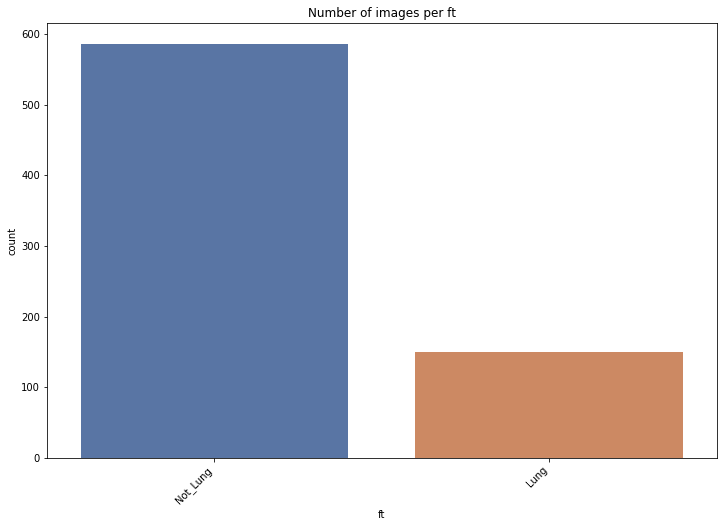

In [11]:
plot_ft_many(df, 'ft')

In [21]:
names = list(df.im_id)
feat = list(df.ft)

In [43]:
names_flowi = [x+'_flowi' for x in names]
flowi = pd.DataFrame()
flowi['im_id'] = names_flowi
flowi['ft'] = feat

flowi.to_csv('lung_table_flowi.csv', index=False)

In [44]:
names_outlines = [x+'_outlines' for x in names]
outlines = pd.DataFrame()
outlines['im_id'] = names_outlines
outlines['ft'] = feat

outlines.to_csv('lung_table_outlines.csv', index=False)

In [45]:
names_overlay = [x+'_overlay' for x in names]
overlay = pd.DataFrame()
overlay['im_id'] = names_overlay
overlay['ft'] = feat

overlay.to_csv('lung_table_overlay.csv', index=False)

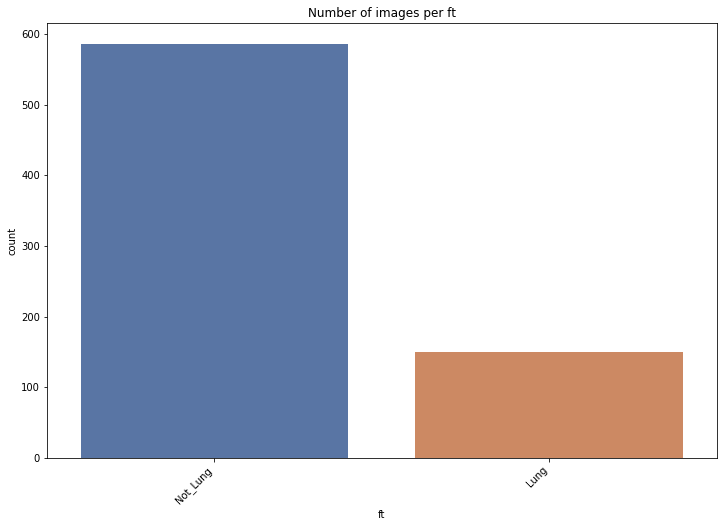

In [36]:
plot_ft_many(overlay, 'ft')

In [46]:
frames = [df, flowi, outlines,overlay ]
all_im = pd.concat(frames)

In [47]:
all_im

,im_id,ft
0,1877-8278,Not_Lung
1,1476-8001,Not_Lung
2,1068-8758,Not_Lung
3,2195-8403,Not_Lung
4,162,Not_Lung
...,...,...
731,706-9149_overlay,Not_Lung
732,153_overlay,Not_Lung
733,1875-8232_overlay,Lung
734,2138-8023_overlay,Not_Lung


In [48]:
all_im.to_csv('lung_seg_norm.csv', index=False)

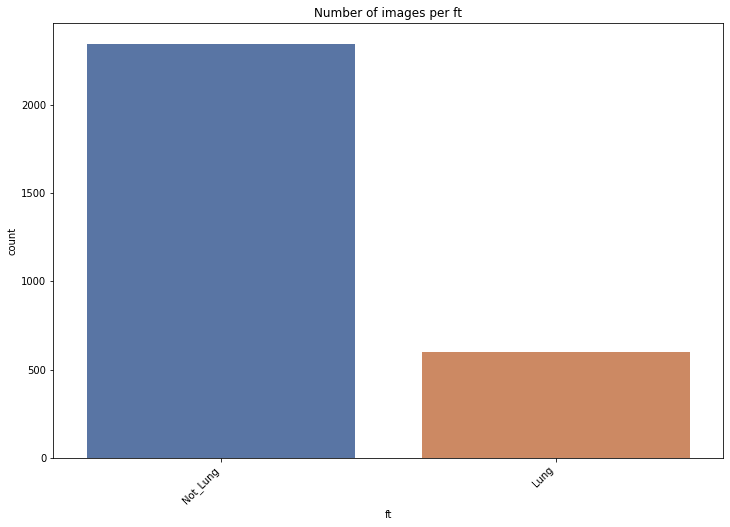

In [49]:
plot_ft_many(all_im, 'ft')

In [1]:
import glob
import pandas as pd
import os

In [2]:
tables = glob.glob('../data/pipeline_tables/tissue_norm/*.csv')

In [3]:
tables

['../data/pipeline_tables/tissue_norm/Kidney_table.csv',
 '../data/pipeline_tables/tissue_norm/Breast_table.csv',
 '../data/pipeline_tables/tissue_norm/Lung_table.csv',
 '../data/pipeline_tables/tissue_norm/Bone_table.csv',
 '../data/pipeline_tables/tissue_norm/Pancreas_table.csv',
 '../data/pipeline_tables/tissue_norm/Skin_table.csv',
 '../data/pipeline_tables/tissue_norm/Ovary_table.csv',
 '../data/pipeline_tables/tissue_norm/Central_Nervous_System_table.csv',
 '../data/pipeline_tables/tissue_norm/Head_and_Neck_table.csv',
 '../data/pipeline_tables/tissue_norm/Haematopoietic_and_Lymphoid_table.csv',
 '../data/pipeline_tables/tissue_norm/Stomach_table.csv',
 '../data/pipeline_tables/tissue_norm/Esophagus_table.csv',
 '../data/pipeline_tables/tissue_norm/Large_Intestine_table.csv',
 '../data/pipeline_tables/tissue_norm/Peripheral_Nervous_System_table.csv']

In [4]:
os.mkdir('tissue_flowi')
os.mkdir('tissue_outlines')
os.mkdir('tissue_overlay')
os.mkdir('tissue_norm-seg')

In [5]:
for tab in tables:
   
#     path = tab.split('/')[:-1]
#     path ='/'.join(path)+"/"+name
    
    tab_name = tab.split('/')[-1]
    name = tab_name.strip('.csv')
    
#     print (path)
    
#     os.mkdir(path)
    
    df = pd.read_csv(tab)
    names = list(df.im_id)
    feat = list(df.ft)

    names_flowi = [x+'_flowi' for x in names]
    flowi = pd.DataFrame()
    flowi['im_id'] = names_flowi
    flowi['ft'] = feat

    flowi.to_csv(f'tissue_flowi/{name}_flowi.csv', index=False)

    names_outlines = [x+'_outlines' for x in names]
    outlines = pd.DataFrame()
    outlines['im_id'] = names_outlines
    outlines['ft'] = feat

    outlines.to_csv(f'tissue_outlines/{name}_outlines.csv', index=False)

    names_overlay = [x+'_overlay' for x in names]
    overlay = pd.DataFrame()
    overlay['im_id'] = names_overlay
    overlay['ft'] = feat

    overlay.to_csv(f'tissue_overlay/{name}_overlay.csv', index=False)
    
    all_norm_segmented = pd.concat([df, flowi, outlines, overlay])
    all_norm_segmented.to_csv(f'tissue_norm-seg/{name}_norm-seg.csv', index=False)